# Real Estate Price Prediction - Bangalore

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Cleaning 

In [104]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [105]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [106]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [107]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [108]:
df.shape

(13320, 9)

In [109]:
df1 = df.drop(['area_type','availability','society','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


##### Removing Null Values

In [110]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [111]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

##### Feature Engineering: Adding new columns

In [112]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2 = df2.drop(['size'],axis='columns')
df2.head()

C:\Users\SIDDHA~1\AppData\Local\Temp/ipykernel_17220/191031290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [113]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

##### Exploring total_sqft columns : Finding different types of values other than float

In [114]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [115]:
df2[~df2['total_sqft'].apply(is_float)].head(15)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


##### Cleaning total_sqft column

In [116]:
def convert_range_sqft(x):
    s = x.split('-')
    if len(s)==2:
        return (float(s[0])+float(s[1]))/2
    try:
        return float(x)
    except:
        return None

In [117]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_range_sqft)

In [118]:
df3.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [119]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [120]:
df3.loc[648]

location      Arekere
total_sqft        NaN
bath              9.0
price           265.0
bhk                 9
Name: 648, dtype: object

In [121]:
df3.shape
df3.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [122]:
# def convert_str_sqft(x):
#     if isinstance(x,str):
#         digit = "",join(filter(lambda x: isdigit(),x))
#         digit=float(digit)
#         unit = "".join(filter(lambda x: not isdigit(),x))
#         if "Sq. Meter" in unit:
#             return round(digit*10.7639,2)
#         else:
#             return round(digit*272.25,2)
#     else:
#         return x
        

In [123]:
# df4 = df3.copy()
# df4.total_sqft = df4.total_sqft.apply(convert_str_sqft)

In [124]:
df3 = df3.dropna()
df3.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

##### Making price per sq ft column

In [125]:
df3['price_per_sqft'] = round(df3['price']*100000/df3['total_sqft'],2)
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [126]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [127]:
price_stats = df3['price_per_sqft'].describe()
price_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678300e+02
25%      4.267700e+03
50%      5.438335e+03
75%      7.317070e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

#### Counting Location data points

In [128]:
df3.location = df3['location'].apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

#### Making location values having <=10 data points as others

In [129]:
less_than_10_loc = location_stats[location_stats<=10]
less_than_10_loc

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [130]:
df3.location = df3.location.apply(lambda x: 'others' if x in less_than_10_loc else x)
df3.head(15)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00
5,Whitefield,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,1310.0,3.0,63.25,3,4828.24
9,others,1020.0,6.0,370.00,6,36274.51


In [131]:
len(df3.location.unique())

241

## Outlier Removal

##### Usually, a bedroom is supposed to have an area of >=300 sqft. But there are few data points in this dataset which doesn't follow that. The point is to remove those data points.

In [132]:
df3.total_sqft.describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [135]:
df3[df3.total_sqft/(df3['bhk'])<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,others,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.30
70,others,500.0,3.0,100.0,3,20000.00


In [137]:
df3.shape

(13200, 6)

In [139]:
df4 = df3[~(df3.total_sqft/(df3['bhk'])<300)]
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [141]:
df4.shape

(12456, 6)

In [142]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

##### Now, I will remove outliers for price_per_sqft beyond (means+std) and (mean-std)

In [144]:
def remove_msd_outlier(df):
    df_out =  pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=False)
    return df_out

df5 = remove_msd_outlier(df4)
df5.shape

(10242, 6)

##### Now, the next thing to check is if the property price of ex: 3 BHK is more than price of 2 BHK for the same sqft area. 

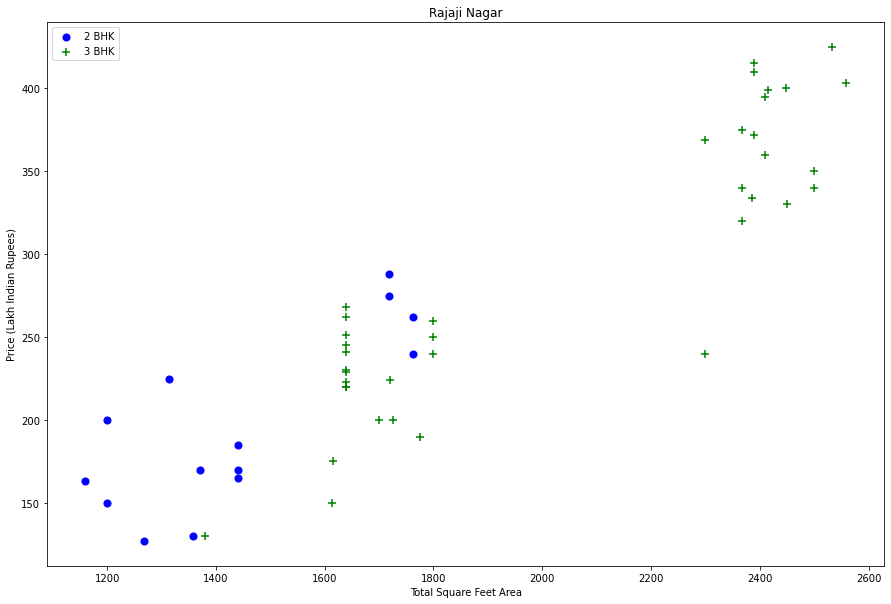

In [145]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

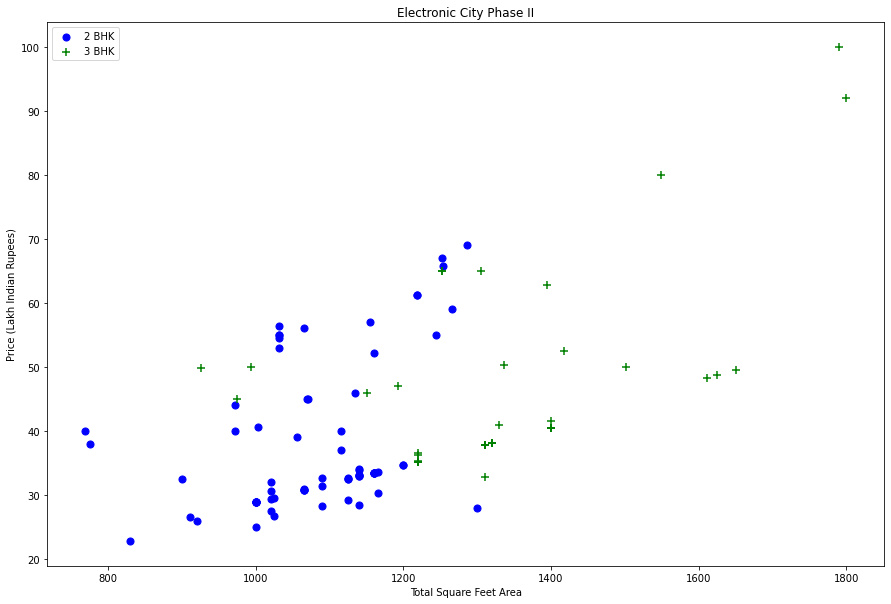

In [147]:
#checking for another location
plot_scatter_chart(df5,'Electronic City Phase II')

##### Now I will remove those data points where price per sqft of 3 bhk apartment is less than the mean price per sqft of 2 bhk apartment

In [148]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7317, 6)

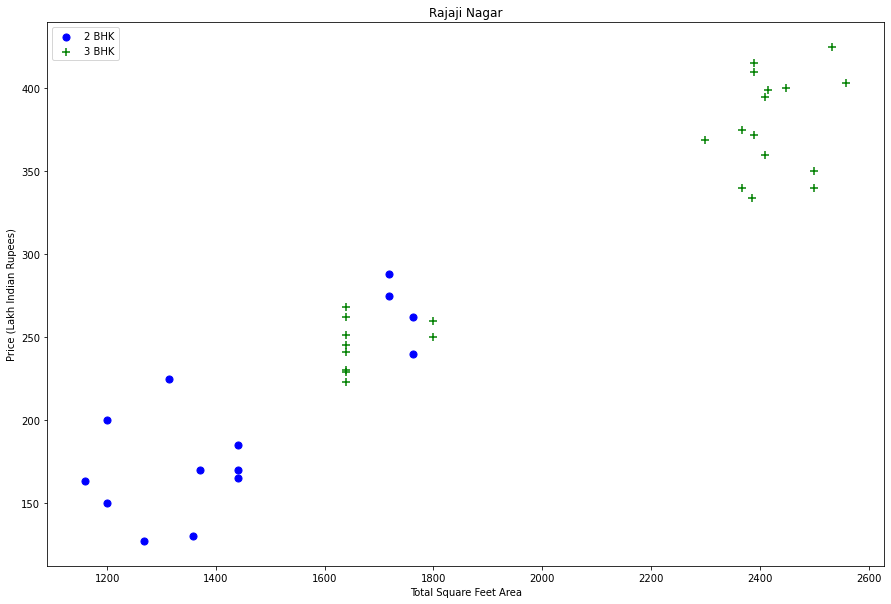

In [149]:
plot_scatter_chart(df6,"Rajaji Nagar")

Text(0, 0.5, 'Count')

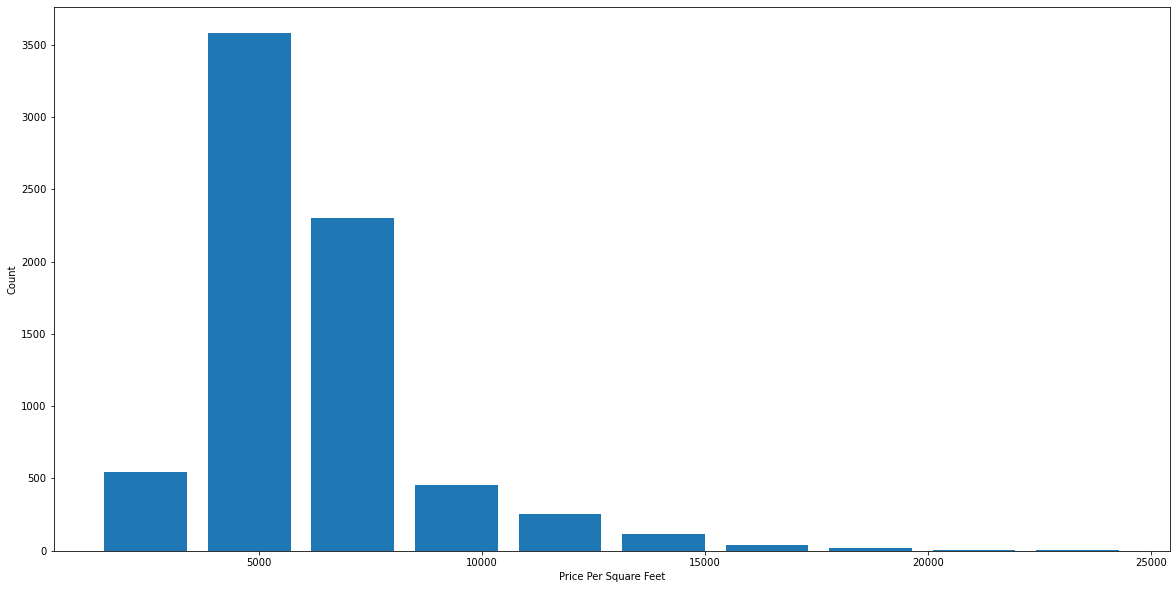

In [151]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Removing Outlier based on baths

In [154]:
df6[df6.bath>df6.bhk+2].head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,2460.0,7.0,80.0,4,3252.03
11366,Nagasandra,7000.0,8.0,450.0,4,6428.57
12103,Thanisandra,1806.0,6.0,116.0,3,6423.03
2620,others,11338.0,9.0,1000.0,6,8819.90


##### Usually, the number of bathrooms in a house is <= number of bedrooms in the house. The above data points thus has to be dropped. Dropping all those datapoints where bath>bhk+2

In [155]:
df7 = df6[df6.bath<(df6.bhk+2)]
df7.shape

(7239, 6)

In [156]:
df8 = df7.drop(['price_per_sqft'],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,148.0,2


In [157]:
df9 = df8.iloc[:,[0,1,2,4,3]]
df9.head()

,location,total_sqft,bath,bhk,price
210,1st Block Jayanagar,2850.0,4.0,4,428.0
848,1st Block Jayanagar,1630.0,3.0,3,194.0
2152,1st Block Jayanagar,1875.0,2.0,3,235.0
7138,1st Block Jayanagar,1200.0,2.0,3,130.0
7358,1st Block Jayanagar,1235.0,2.0,2,148.0


# Data Modeling

### One Hot Encoding

In [166]:
dummy = pd.get_dummies(df9.location)
dummy.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df10 = pd.concat([df9,dummy.drop('others',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,4,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,3,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,3,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1st Block Jayanagar,1200.0,2.0,3,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1st Block Jayanagar,1235.0,2.0,2,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df10 = df10.drop('location',axis='columns')
df10.head()

,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling

In [174]:
X = df10.drop('price',axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
y = df10.price
y.head(3)

210     428.0
848     194.0
2152    235.0
Name: price, dtype: float64

### Splitting data into training and test set

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [177]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [178]:
regressor.score(X_test,y_test)

0.8270254636551959

## Using K-cross fold validation to find accuracy of our model

In [179]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

## Finding best model using GridSearch CV

In [180]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726766,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.721966,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Predicting results on data

In [183]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return regressor.predict([x])[0]

In [185]:
predict_price('1st Block Jayanagar',2850, 4, 4)

345.161807544699

In [186]:
df10.head(10)

,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,2750.0,4.0,4,413.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,2450.0,4.0,4,368.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2106,1875.0,3.0,3,167.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2292,1500.0,5.0,5,85.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2914,2065.0,4.0,3,210.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
predict_price('1st Phase JP Nagar',1875, 3, 3)

160.930973034854

In [195]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.52914257454498

In [196]:
predict_price('Indira Nagar',1000, 2, 2)

177.1641125547044

In [198]:
predict_price('Yelahanka',1000, 2, 2)

42.9758689758672

# Export tested model to a pickle file

In [200]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(regressor,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [201]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))